# Summer 2025 Phytoplankton Bloom

<img src="phyto-bloom-boat.jpg" width="" align="" />

Photo (above) and caption (below) by Lynette Dawson on July 1, 2025. 

"The Coccolithophore bloom in Barkley Sound. Coccolithorids are single-celled phytoplankton that produce calcium carbonate plates. (It has been suggested they do this to avoid predation by microzooplankton). The light reflects off the plates to produce this amazing colour. They are an important part of the biological pump, and a carbon sink. However when a bloom is too dense it may decrease nutrient flow to lower levels of the ocean."

This bloom is also visible from space, as evident in the this satellite image from July 6, 2025.

<img src="barkley-sound-dfo-photo.png" width="" align="" />

Satellite image captured by DFO on July 6, 2025.

### Set Up Programming Environment

The code below installs the ONC, pandas, matplotlib, plotly and cmocean libraries. These libraries contain external code that add extra features to Python. When we install a library the code is placed on to your system where it can be found and used by Python.

In [1]:
!pip install onc         # Installs the ONC Python client to access Ocean Networks Canada data via their public API
!pip install pandas      # Installs pandas, a powerful data analysis and manipulation library that uses DataFrames
!pip install matplotlib  # Installs matplotlib, a widely used plotting library for creating static and animated visualizations
!pip install plotly      # Installs Plotly, a library for creating interactive, web-based plots and dashboards
!pip install cmocean     # Installs cmocean, a set of colormaps tailored for oceanographic data visualization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.5/128.5 kB 16.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.9/421.9 kB 26.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


Next, we import from these libraries. When we import a library, it loads the installed code into our program so that we can use it in this notebook.

In [2]:
import onc # library for ONC
import BMSC_helpers as my_functions # the helper functions
import pandas as pd # library to make data frames and datetime objects
from datetime import datetime

## Plotting Jan 1, 2025 to Present

### Define parameters

In [3]:
# Time frame - the start of 2025 through to the current date
start_25 = "2025-01-01T00:00:00.000Z"
today = datetime.utcnow().replace(microsecond=0).isoformat() + ".000Z"

# Properties available at Folger Pinnacle
# See documentation - https://wiki.oceannetworks.ca/x/2w7nAg
pinnacle_properties = ["oxygen", "salinity", "seawatertemperature", "sigmat", "chlorophyll", "turbidityntu"]

# Location code for Pinnacle
# See documentation - https://wiki.oceannetworks.ca/x/gYLyAg
pinnacle_locationCode = "FGPPN"

# Resample (necessary for time series greater than 1 day)
resample = 1800 # Sets subsampling period for every 1800 seconds

### Connect to API

> Enter your token in the code block below. 

You can find your token by logging into https://data.oceannetworks.ca/, viewing your profile, and clicking the Web Services API tab.

In [10]:
import os # remove for student copy
my_functions.create_onc_client(token=os.environ['GRACE_TOKEN']) # INTERACTIVE: Enter your token (in quotes).
# STUDENT VERSION: my_functions.create_onc_client(token="ENTER YOUR TOKEN HERE") # INTERACTIVE: Enter your token (in quotes).

### Make API request and create data frame

In [11]:
# Create the data frame for Folger Pinnacle
pinnacle_2025_df = my_functions.get_multi_property_dataframe(start=start_25, end=today, locationCode=pinnacle_locationCode, propertyCodes=pinnacle_properties, resample=resample)

In [12]:
pinnacle_2025_df # Preview the data frame

Oxygen (ml/l)  Salinity (psu)  Temperature (°C)  \
Time                                                                         
2025-01-01 00:15:00+00:00       5.547506       30.409648         10.176673   
2025-01-01 00:45:00+00:00       5.525520       30.504511         10.196597   
2025-01-01 01:15:00+00:00       5.493677       30.534327         10.225626   
2025-01-01 01:45:00+00:00       5.506988       30.564757         10.242229   
2025-01-01 02:15:00+00:00       5.525585       30.598705         10.253126   
...                                  ...             ...               ...   
2025-08-06 20:15:00+00:00       3.777965       32.308318         10.144063   
2025-08-06 20:45:00+00:00       3.720675       32.314503         10.144630   
2025-08-06 21:15:00+00:00       3.962030       32.300722         10.427853   
2025-08-06 21:45:00+00:00       4.060798       32.295822         10.530598   
2025-08-06 22:15:00+00:00            NaN             NaN               NaN   

                           Sigma-t (kg/m3)  Chlorophyll (µg/l)  \
Time                                                             
2025-01-01 00:15:00+00:00        23.341404            3.000029   
2025-01-01 00:45:00+00:00        23.412065            3.307331   
2025-01-01 01:15:00+00:00        23.430541            3.162112   
2025-01-01 01:45:00+00:00        23.451527            2.983481   
2025-01-01 02:15:00+00:00        23.476184            3.037565   
...                                    ...                 ...   
2025-08-06 20:15:00+00:00        24.826841           49.130000   
2025-08-06 20:45:00+00:00        24.831555           49.130000   
2025-08-06 21:15:00+00:00        24.773060           49.130000   
2025-08-06 21:45:00+00:00        24.751780           49.130000   
2025-08-06 22:15:00+00:00              NaN                 NaN   

                           Turbidity (NTU)  
Time                                        
2025-01-01 00:15:00+00:00              NaN  
2025-01-01 00:45:00+00:00              NaN  
2025-01-01 01:15:00+00:00              NaN  
2025-01-01 01:45:00+00:00              NaN  
2025-01-01 02:15:00+00:00              NaN  
...                                    ...  
2025-08-06 20:15:00+00:00            24.59  
2025-08-06 20:45:00+00:00            24.59  
2025-08-06 21:15:00+00:00            24.59  
2025-08-06 21:45:00+00:00            24.59  
2025-08-06 22:15:00+00:00              NaN  

[10461 rows x 6 columns]

### Plot using the data frame

In [13]:
my_functions.plot_dataframe_plotly(df=pinnacle_2025_df, locationCode=pinnacle_locationCode)

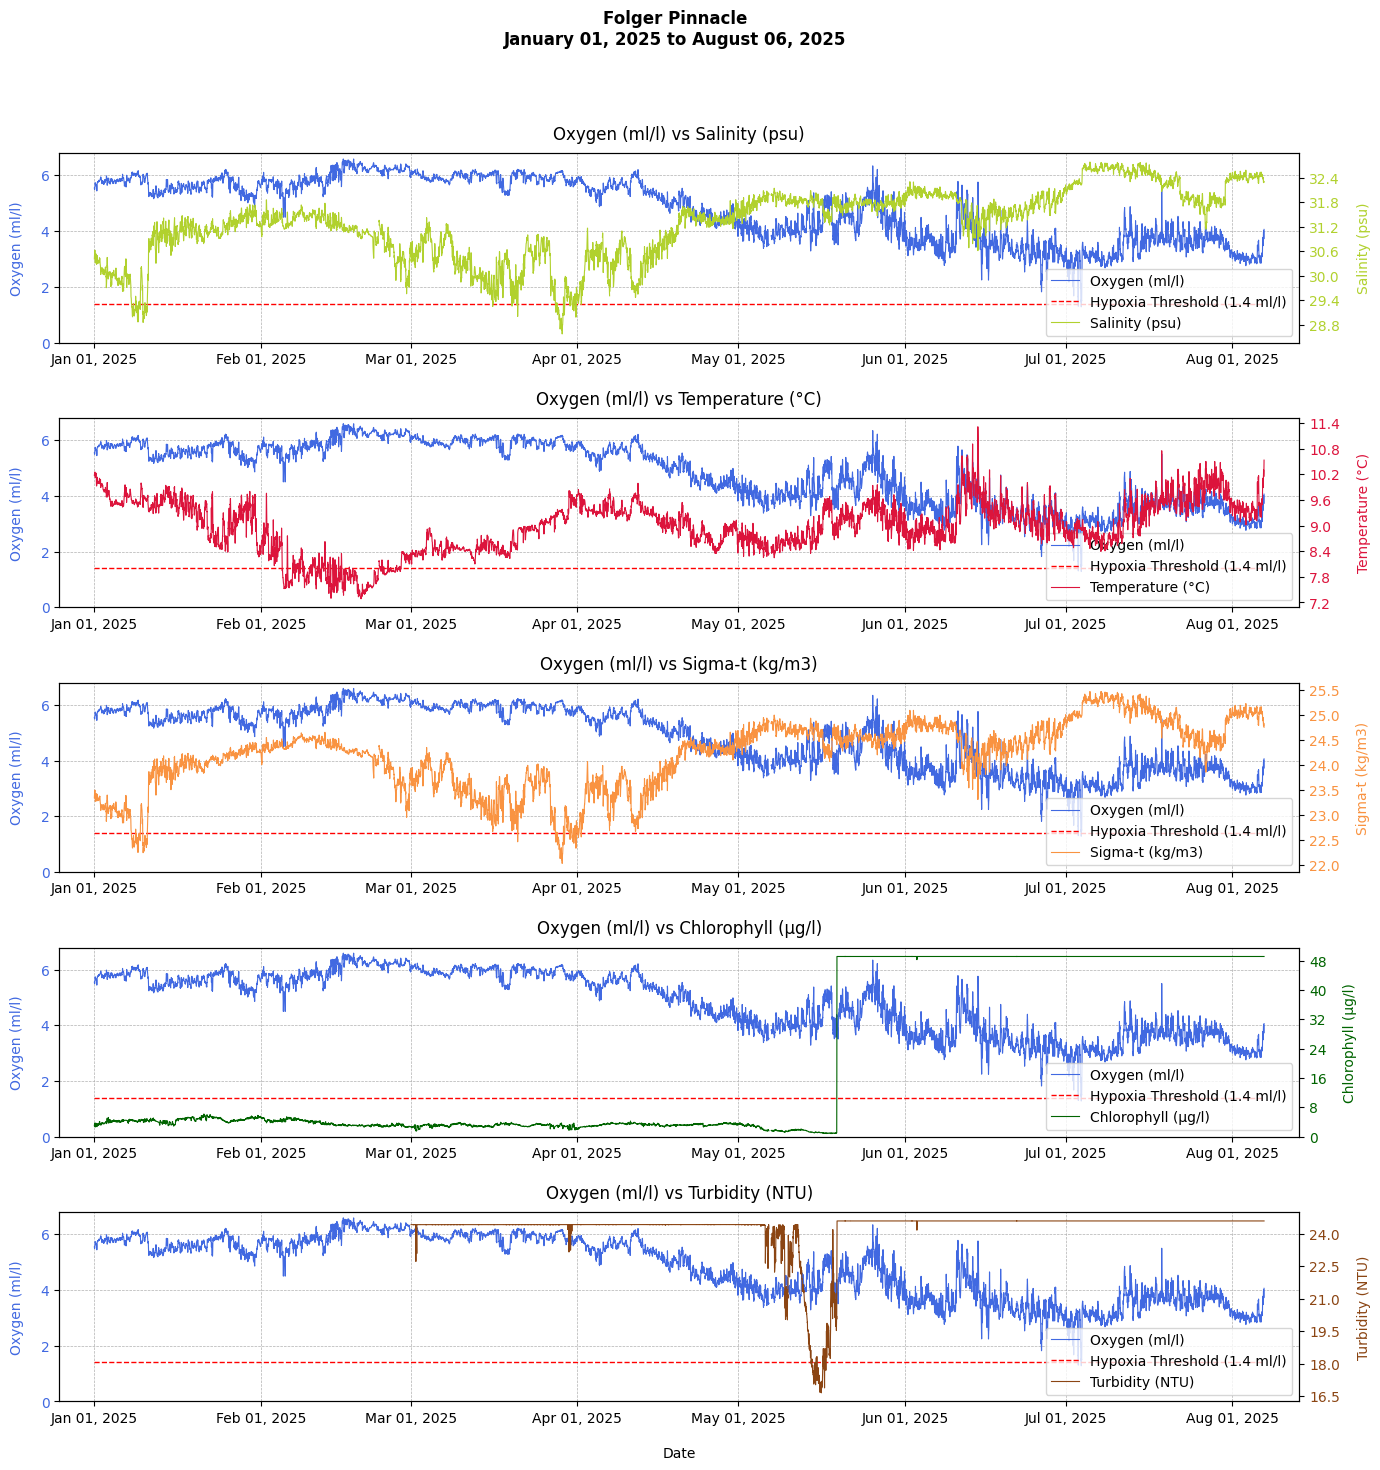

In [14]:
my_functions.subplot_all_with_oxygen(df=pinnacle_2025_df, locationCode=pinnacle_locationCode)

## Upwelling

Folger Deep is a useful site to observe the timing of upwelling along the shelf. Upwelling is a natural phenomenon that brings colder, saltier, low oxygen, nutrient-rich water to the surface and in this case, into the mouth of Barkley Sound. This surge in nutrients often causes a rapid increase in phytoplankton populations, also known as a bloom. The graphic below shows the typical upwelling dynamic off the coast of Bamfield. Notice how the wind is moving along the coast towards the south. Due to Ekman transport and the Coriolis force, the surface waters move offshore towards the west, creating space for water from the deep to flow upwards and fill the gap. 

<img src="upwelling-diagram.png" width="" align="" />

Using our profile graphic of Folger Pinnacle and Folger Deep, we can overlay the same atmosphere and ocean dynamics to see how upwelling is happening at our station location. In this graphic, the land is on the left hand side. Notice the wind direction is the same; headed to the south, coming from the north. The surface currents are also being transported West, away from land, allowing the bottom water to be upwelled to the surface. Lets see what this looks like in the data.

<img src="folger-passage-upwelling-diagram.png" width="" align="" />

The state of the ocean (SOO) plot below highlights 2025 data (pink) compared to a 16 year average (2009-2024; black) for 4 different parameters, Oxygen, sigma-t, salinity and temperature. Notice how the 2025 data (pink) changes from low to high salinity and high to low temperature compared to the 2009-2024 average (black)? This is a sign of upwelling bringing colder, saltier water up. 

<img src="FGPD-StateOfOcean.png" width="" align="" />

## Plotting May 1, 2025 to Present

### Create a new data frame of shorter time series by 'slicing' original data frame

In [15]:
start_summer = "2025-05-01T00:00:00.000Z" # Define May 1st, 2025 in ISO 8601 UTC format
dt_start_summer = pd.to_datetime(start_summer) # Convert string to date time object (Python will recognize as an actual date in time)
pinnacle_summer_df = pinnacle_2025_df.loc[dt_start_summer:] # Slice original dataframe to start on May 1st, 2025

In [16]:
pinnacle_summer_df # Preview new data frame

Oxygen (ml/l)  Salinity (psu)  Temperature (°C)  \
Time                                                                         
2025-05-01 00:15:00+00:00       4.193243       31.507823          8.636898   
2025-05-01 00:45:00+00:00       4.206925       31.512380          8.624747   
2025-05-01 01:15:00+00:00       4.166405       31.525979          8.606509   
2025-05-01 01:45:00+00:00       4.190881       31.560468          8.629983   
2025-05-01 02:15:00+00:00       4.134026       31.606745          8.629181   
...                                  ...             ...               ...   
2025-08-06 20:15:00+00:00       3.777965       32.308318         10.144063   
2025-08-06 20:45:00+00:00       3.720675       32.314503         10.144630   
2025-08-06 21:15:00+00:00       3.962030       32.300722         10.427853   
2025-08-06 21:45:00+00:00       4.060798       32.295822         10.530598   
2025-08-06 22:15:00+00:00            NaN             NaN               NaN   

                           Sigma-t (kg/m3)  Chlorophyll (µg/l)  \
Time                                                             
2025-05-01 00:15:00+00:00        24.439636            3.375887   
2025-05-01 00:45:00+00:00        24.445014            3.272606   
2025-05-01 01:15:00+00:00        24.458381            3.351084   
2025-05-01 01:45:00+00:00        24.481891            3.411952   
2025-05-01 02:15:00+00:00        24.518248            3.371073   
...                                    ...                 ...   
2025-08-06 20:15:00+00:00        24.826841           49.130000   
2025-08-06 20:45:00+00:00        24.831555           49.130000   
2025-08-06 21:15:00+00:00        24.773060           49.130000   
2025-08-06 21:45:00+00:00        24.751780           49.130000   
2025-08-06 22:15:00+00:00              NaN                 NaN   

                           Turbidity (NTU)  
Time                                        
2025-05-01 00:15:00+00:00        24.422708  
2025-05-01 00:45:00+00:00        24.422517  
2025-05-01 01:15:00+00:00        24.404274  
2025-05-01 01:45:00+00:00        24.421649  
2025-05-01 02:15:00+00:00        24.422083  
...                                    ...  
2025-08-06 20:15:00+00:00        24.590000  
2025-08-06 20:45:00+00:00        24.590000  
2025-08-06 21:15:00+00:00        24.590000  
2025-08-06 21:45:00+00:00        24.590000  
2025-08-06 22:15:00+00:00              NaN  

[4701 rows x 6 columns]

### Plot using new data frame

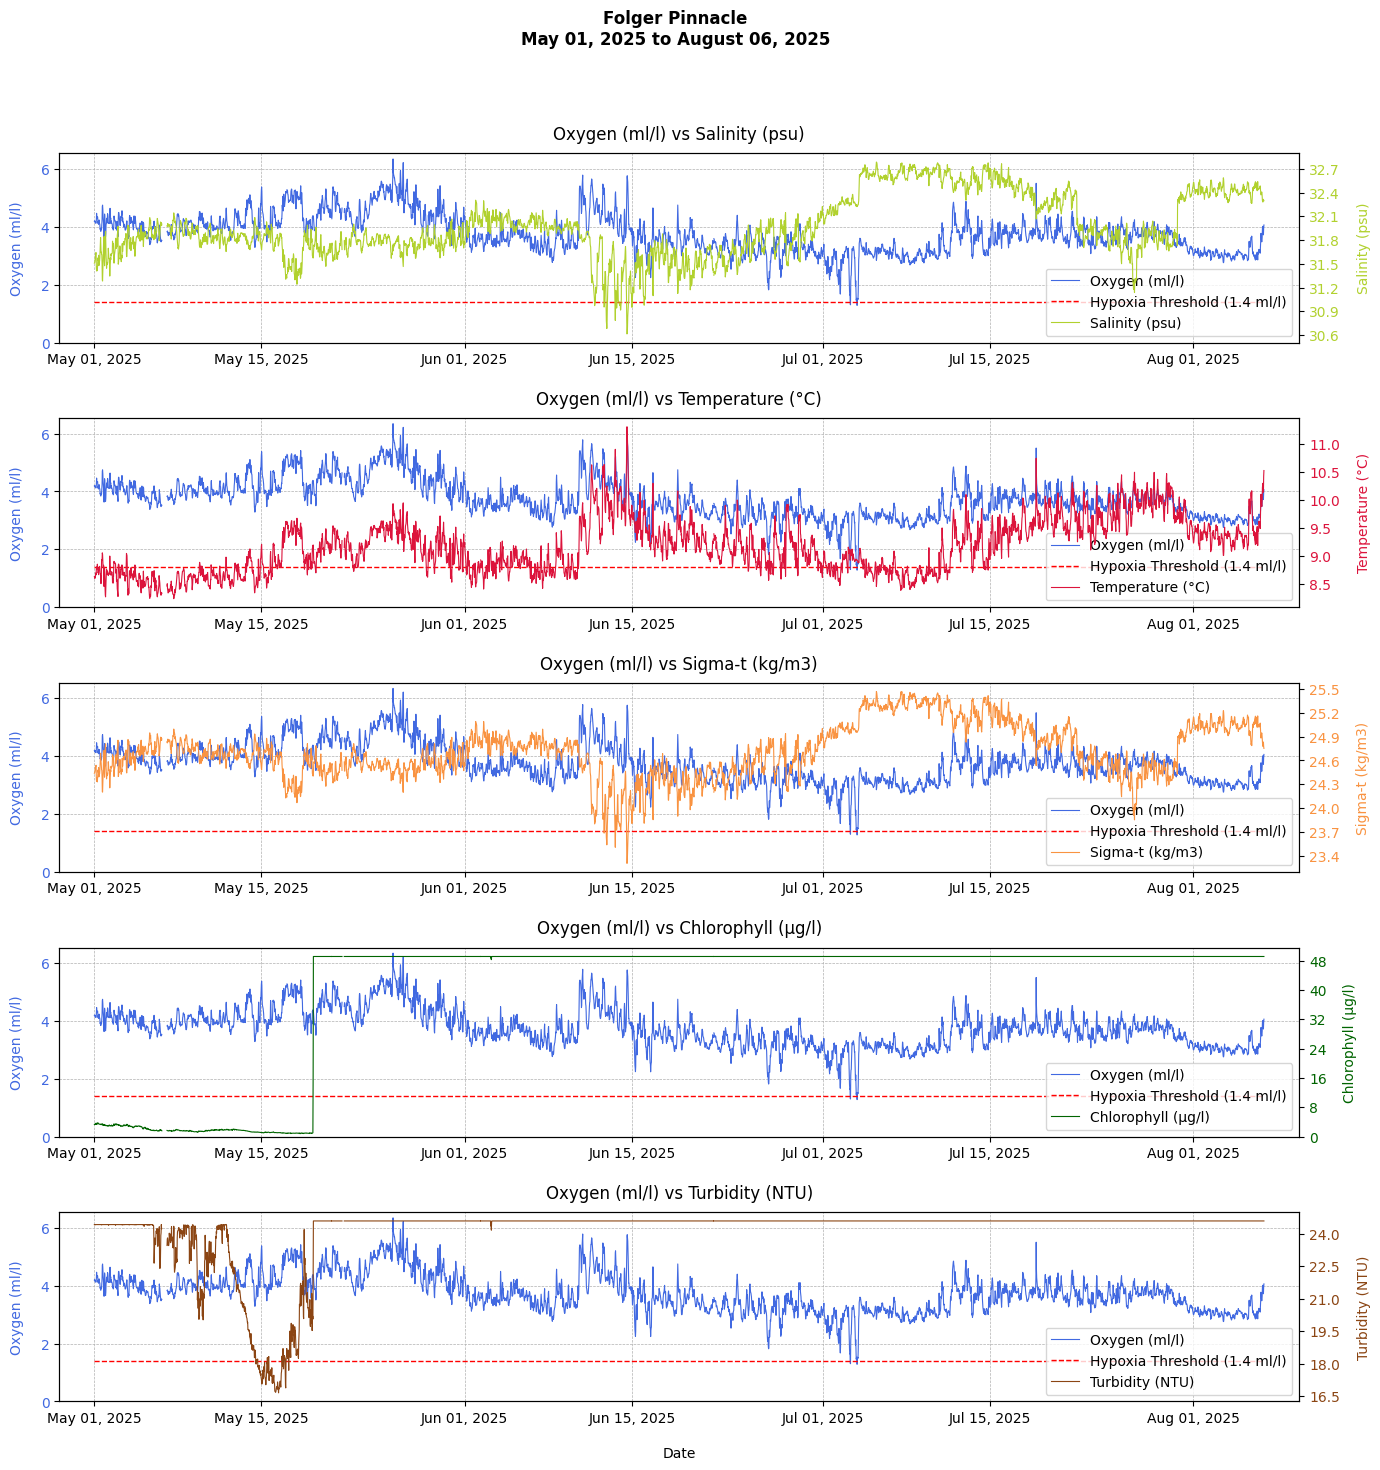

In [17]:
my_functions.subplot_all_with_oxygen(df=pinnacle_summer_df, locationCode=pinnacle_locationCode)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1cd2cd01-70e8-41b6-af2d-f797c6675dbe' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>